In [161]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [162]:
training_labels = pd.read_csv('../Data/training_set_labels.csv')
training_values = pd.read_csv('../Data/training_set_values.csv')
test_values = pd.read_csv('../Data/test_set_values.csv')

In [163]:
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [164]:
training_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [165]:
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [166]:
training_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

- functional - the waterpoint is operational and there are no repairs needed
- functional needs repair - the waterpoint is operational, but needs repairs
- non functional - the waterpoint is not operational

In [167]:
training_labels['status_group'] = training_labels['status_group'].map({'non functional': 'non operational', 'functional': 'operational', 
                                     'functional needs repair': 'operational'})

In [168]:
training_labels['status_group'].value_counts()

operational        36576
non operational    22824
Name: status_group, dtype: int64

In [169]:
training_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [170]:
training_values['funder'].value_counts()[:10]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [171]:
training_values['installer'].value_counts()[:20]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [172]:
training_values['date_recorded'] = pd.to_datetime(training_values['date_recorded'])

In [173]:
training_values['construction_year'] = training_values['construction_year'].replace(to_replace=0, value=np.nan)

In [174]:
training_values['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [175]:
type(training_values['public_meeting'].values[0])

bool

In [176]:
type(training_values['date_recorded'].values[0])

numpy.datetime64

In [177]:
from missingpy import MissForest

In [178]:
imputer = MissForest()

In [179]:
forest_try = training_values[['id', 'amount_tsh', 'funder', 'gps_height']]

In [180]:
forest_try

,id,amount_tsh,funder,gps_height
0,69572,6000.0,Roman,1390
1,8776,0.0,Grumeti,1399
2,34310,25.0,Lottery Club,686
3,67743,0.0,Unicef,263
4,19728,0.0,Action In A,0
...,...,...,...,...
59395,60739,10.0,Germany Republi,1210
59396,27263,4700.0,Cefa-njombe,1212
59397,37057,0.0,NaN,0
59398,31282,0.0,Malec,0


In [181]:
forest_try.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          59400 non-null  int64  
 1   amount_tsh  59400 non-null  float64
 2   funder      55765 non-null  object 
 3   gps_height  59400 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [182]:
forest_try['funder'].value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [183]:
forest_try['funder'] = forest_try['funder'].map({'Government Of Tanzania': 0, 'Danida': 1, 'Hesawa': 2, 'Rwssp': 3, 'World Bank': 4, 'Kkkt': 5,
                         'World Vision': 6, 'Unicef': 7, 'Tasaf': 8, 'District Council': 9})

<ipython-input-183-0cfe0f794264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_try['funder'] = forest_try['funder'].map({'Government Of Tanzania': 0, 'Danida': 1, 'Hesawa': 2, 'Rwssp': 3, 'World Bank': 4, 'Kkkt': 5,


In [184]:
forest_try['funder'].value_counts()

0.0    9084
1.0    3114
2.0    2202
3.0    1374
4.0    1349
5.0    1287
6.0    1246
7.0    1057
8.0     877
9.0     843
Name: funder, dtype: int64

In [185]:
forest_try = forest_try.loc[forest_try['funder'] <= 10]

In [186]:
forest_try['funder'].value_counts()

0.0    9084
1.0    3114
2.0    2202
3.0    1374
4.0    1349
5.0    1287
6.0    1246
7.0    1057
8.0     877
9.0     843
Name: funder, dtype: int64

In [187]:
forest_try['funder'] = forest_try['funder'].replace(to_replace=0, value=np.nan)

<ipython-input-187-0d912c0b8970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_try['funder'] = forest_try['funder'].replace(to_replace=0, value=np.nan)


In [188]:
forest_try

,id,amount_tsh,funder,gps_height
3,67743,0.0,7.0,263
7,54551,0.0,3.0,0
11,50409,200.0,1.0,1062
12,36957,0.0,6.0,0
16,48451,500.0,7.0,1703
...,...,...,...,...
59383,44616,0.0,4.0,11
59391,44885,0.0,NaN,540
59392,40607,0.0,NaN,0
59394,11164,500.0,4.0,351


In [189]:
training_values_imputed = imputer.fit(forest_try, cat_vars=[2])

In [190]:
training_values_imputed = imputer.transform(forest_try)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [191]:
training_values_imputed

array([[6.7743e+04, 0.0000e+00, 7.0000e+00, 2.6300e+02],
       [5.4551e+04, 0.0000e+00, 3.0000e+00, 0.0000e+00],
       [5.0409e+04, 2.0000e+02, 1.0000e+00, 1.0620e+03],
       ...,
       [4.0607e+04, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [1.1164e+04, 5.0000e+02, 4.0000e+00, 3.5100e+02],
       [2.6348e+04, 0.0000e+00, 4.0000e+00, 1.9100e+02]])

In [192]:
forest_try = pd.DataFrame(training_values_imputed)

In [193]:
forest_try[2].value_counts()

1.0    5137
2.0    3941
4.0    2538
5.0    1953
3.0    1922
6.0    1904
9.0    1799
7.0    1701
8.0    1538
Name: 2, dtype: int64

### Can drop `recorded_by` column and probably want to drop `num_private` because no description

In [194]:
# Could change unknown to NaN and use imputer, 'quality_group', 'water_quality', 'quantity', 'quantity_group', 'source',
# 'source_class', 
training_values['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [195]:
# Looks like 0 is unkown for these
training_values['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [196]:
training_values['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-06-01      1
2011-09-08      1
2011-09-16      1
2011-09-13      1
2011-09-18      1
Name: date_recorded, Length: 356, dtype: int64

In [197]:
training_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [198]:
training_values['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [199]:
training_values['scheme_name'].value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
BL Nshere Juu                1
Ujindali                     1
Bwawa                        1
Mfumbo                       1
Ruvu Gwata water supply      1
Name: scheme_name, Length: 2696, dtype: int64

In [200]:
df = training_values.merge(training_labels, on='id')

In [201]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,operational
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,operational
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non operational
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational


In [202]:
df.shape

(59400, 41)

In [203]:
training_values.shape

(59400, 40)

In [204]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.004165
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.006331
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,-0.006244
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.028082
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,0.038547
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,-0.003250
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,-0.009755
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.007518
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.032544
construction_year,-0.004165,0.006331,-0.006244,0.028082,0.038547,-0.003250,-0.009755,0.007518,0.032544,1.000000


In [205]:
df['status_group'] = df['status_group'].map({'non operational': 0, 'operational': 1})

In [206]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.004165,-0.003827
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.006331,0.051170
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,-0.006244,0.106942
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.028082,-0.036516
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,0.038547,0.027984
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,-0.003250,0.003886
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,-0.009755,-0.105444
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.007518,-0.070882
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.032544,0.016576
construction_year,-0.004165,0.006331,-0.006244,0.028082,0.038547,-0.003250,-0.009755,0.007518,0.032544,1.000000,0.273580


In [207]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [208]:
training_values['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Lgcd                         1
Pwagu                        1
Ruvu Darajani                1
Ju                           1
Mwanaisha Mwidadi            1
Name: funder, Length: 1897, dtype: int64

In [209]:
training_values['funder'].value_counts().index[0]

'Government Of Tanzania'

In [210]:
def string_to_number(col):
    unique_vals = col.unique()
    for x in unique_vals:
        col.replace(to_replace=unique_vals, value=list(range(len(unique_vals))), inplace=True)

In [211]:
unique_vals = training_values['funder'].value_counts().index
string_to_numbers = training_values['funder'].replace(to_replace=unique_vals, value=list(range(len(unique_vals))))
string_to_numbers.value_counts()

0.0       9084
1.0       3114
2.0       2202
3.0       1374
4.0       1349
          ... 
1705.0       1
1442.0       1
1362.0       1
1677.0       1
1550.0       1
Name: funder, Length: 1897, dtype: int64

In [212]:
training_values['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Lgcd                         1
Pwagu                        1
Ruvu Darajani                1
Ju                           1
Mwanaisha Mwidadi            1
Name: funder, Length: 1897, dtype: int64

In [213]:
training_values['funder'].value_counts().index[17]

'Ministry Of Water'

In [214]:
list(range(len(unique_vals)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [215]:
training_values['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Lgcd                         1
Pwagu                        1
Ruvu Darajani                1
Ju                           1
Mwanaisha Mwidadi            1
Name: funder, Length: 1897, dtype: int64

In [216]:
def transform_to_numbers(dataframe, column, column):
    unique_vals = dataframe[column].value_counts().index
    string_to_numbers = dataframe[column].replace(to_replace=unique_vals, value=list(range(len(unique_vals))))
    return string_to_numbers

SyntaxError: duplicate argument 'column' in function definition (<ipython-input-216-ea68a72fe6ce>, line 1)

In [ ]:
transformed_col = transform_to_numbers(training_values, 'funder')

In [ ]:
transformed_col.value_counts()

In [ ]:
training_values['funder'].value_counts()

# `transform_columns` takes columns and turns the values into numbers for the MissForest imputer

In [217]:
def transform_columns(dataframe, columns):
    transformed_df = pd.DataFrame()
    
    for column in columns:
        unique_vals = dataframe[column].value_counts().index
        string_to_numbers = dataframe[column].replace(to_replace=unique_vals, value=list(range(len(unique_vals))))
        transformed_df[column] = string_to_numbers
        
    return transformed_df

In [218]:
df_num_cats = transform_columns(training_values, ['funder', 'installer'])

In [219]:
df_num_cats

,funder,installer
0,34.0,90.0
1,135.0,163.0
2,449.0,16.0
3,7.0,32.0
4,1876.0,60.0
...,...,...
59395,15.0,10.0
59396,250.0,308.0
59397,NaN,NaN
59398,730.0,618.0


In [220]:
training_values.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

# `df1` is df before train/test split w/ unnecessary columns dropped

In [241]:
df1 = training_values.drop(['amount_tsh', 'recorded_by', 'scheme_name',
                           'payment_type', 'quantity_group'], axis=1)

In [222]:
df1.shape

(59400, 35)

In [232]:
df1 = df1.replace({'none': None,'unknown' : None, -2.00E-08: None, '0': None})

In [233]:
df1.dropna(subset=['longitude'], inplace=True)

In [234]:
df1.dropna(subset=['latitude'], inplace=True)

In [238]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [239]:
training_labels

,id,status_group
0,69572,operational
1,8776,operational
2,34310,operational
3,67743,non operational
4,19728,operational
...,...,...
59395,60739,operational
59396,27263,operational
59397,37057,operational
59398,31282,operational


# Starting fresh with df from Bobby

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from missingpy import MissForest
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [60]:
training_labels = pd.read_csv('../Data/training_set_labels.csv')
training_values = pd.read_csv('../Data/training_set_values.csv')
test_values = pd.read_csv('../Data/test_set_values.csv')
X_train_imputed_df = pd.read_csv('../Data/X_train_imputed_df.csv')

In [3]:
training_labels['status_group'] = training_labels['status_group'].map({'non functional': 'non operational', 'functional': 'operational', 
                                     'functional needs repair': 'operational'})

In [4]:
df = training_values.merge(training_labels, on='id')

In [5]:
df.drop("id", axis = 1,inplace=True)

In [6]:
columns_to_drop = ["amount_tsh", "num_private", "recorded_by", "payment_type", "extraction_type", "extraction_type_group", 
                   "water_quality", "quantity_group"]
df_small = df.drop(columns_to_drop, axis = 1)

In [7]:
df_small_small = df_small.replace({'none': None,'unknown' : None, -2.00E-08: None, "0": None})
df_small_small["district_code"].replace({0: None}, inplace=True)
df_small_small["population"].replace({0: None}, inplace=True)
df_small_small["construction_year"].replace({0: None}, inplace=True)

In [8]:
df_small_small.dropna(subset=['latitude'],inplace=True)

# Function for MissForest imputer

In [9]:
# this function takes columns from the df and turns the value into numbers in order to impute nulls with MissForest
def transform_columns(dataframe, columns):
    transformed_df = pd.DataFrame()
    
    for column in columns:
        unique_vals = dataframe[column].value_counts().index
        string_to_numbers = dataframe[column].replace(to_replace=unique_vals, value=list(range(len(unique_vals))))
        transformed_df[column] = string_to_numbers
        
    return transformed_df

In [10]:
transformed_df = transform_columns(df_small_small, ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 
                                                    'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 
                                                    'scheme_management', 'scheme_name', 'permit', 'extraction_type_class',
                                                    'management', 'management_group', 'payment', 'quality_group', 
                                                    'quantity', 'source', 'source_type', 'source_class','waterpoint_type',
                                                    'waterpoint_type_group', 'status_group'])

In [11]:
transformed_df.head()

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,management_group,payment,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,33.0,87.0,NaN,6,1503.0,0,0,4.0,35,540,...,0.0,4.0,0.0,0.0,0.0,0,0.0,0,0,0
1,131.0,160.0,1.0,1,2047.0,14,14,1.0,20,129,...,0.0,0.0,0.0,1.0,4.0,4,1.0,0,0,0
2,437.0,14.0,1207.0,0,0.0,18,17,3.0,79,1547,...,0.0,1.0,0.0,0.0,6.0,5,1.0,3,0,0
3,7.0,32.0,24391.0,7,269.0,17,20,14.0,108,623,...,0.0,0.0,0.0,2.0,2.0,2,0.0,3,0,1
4,1542.0,59.0,0.0,1,6086.0,6,5,0.0,17,1375,...,3.0,0.0,0.0,3.0,4.0,4,1.0,0,0,0


In [12]:
df_small_small['funder'].value_counts().index[33]

'Roman'

In [13]:
df_small_small.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,None,Lake Nyasa,Mnyusi B,Iringa,...,user-group,pay annually,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,operational
1,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,user-group,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational
2,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,user-group,pay per bucket,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,operational
3,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,user-group,never pay,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non operational
4,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,other,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational


In [14]:
df_small_small['basin'].value_counts().index[6]

'Lake Nyasa'

In [15]:
transformed_df['date_recorded'] = df_small_small['date_recorded']
transformed_df['gps_height'] = df_small_small['gps_height']
transformed_df['longitude'] = df_small_small['longitude']
transformed_df['latitude'] = df_small_small['latitude']
transformed_df['population'] = df_small_small['population']
transformed_df['construction_year'] = df_small_small['construction_year']

In [16]:
transformed_df.head()

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_class,waterpoint_type,waterpoint_type_group,status_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,33.0,87.0,NaN,6,1503.0,0,0,4.0,35,540,...,0.0,0,0,0,2011-03-14,1390,34.938093,-9.856322,109,1999
1,131.0,160.0,1.0,1,2047.0,14,14,1.0,20,129,...,1.0,0,0,0,2013-03-06,1399,34.698766,-2.147466,280,2010
2,437.0,14.0,1207.0,0,0.0,18,17,3.0,79,1547,...,1.0,3,0,0,2013-02-25,686,37.460664,-3.821329,250,2009
3,7.0,32.0,24391.0,7,269.0,17,20,14.0,108,623,...,0.0,3,0,1,2013-01-28,263,38.486161,-11.155298,58,1986
4,1542.0,59.0,0.0,1,6086.0,6,5,0.0,17,1375,...,1.0,0,0,0,2011-07-13,0,31.130847,-1.825359,None,None


In [17]:
transformed_df['date_recorded'] = pd.to_datetime(transformed_df['date_recorded'])

In [18]:
transformed_df['date_recorded'] = transformed_df['date_recorded'].dt.strftime('%Y')

In [19]:
transformed_df['date_recorded']

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
59395    2013
59396    2011
59397    2011
59398    2011
59399    2011
Name: date_recorded, Length: 57588, dtype: object

# Train/Test Split

In [20]:
X = transformed_df.drop('status_group', axis=1)
y = transformed_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.3)

In [21]:
imputer = MissForest(random_state=33, max_depth=1)

In [22]:
X_train_imputed = imputer.fit(X_train, cat_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                                                 21, 22, 23, 24])
X_train_imputed = imputer.transform(X_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


In [23]:
X_train_imputed

array([[ 1.60000000e+01,  1.59000000e+02,  2.51990000e+04, ...,
        -6.15354545e+00,  2.12337527e+02,  1.99838723e+03],
       [ 1.20000000e+01,  2.00000000e+00,  2.68320000e+04, ...,
        -3.32680957e+00,  5.30000000e+02,  1.99300000e+03],
       [ 1.20000000e+01,  5.00000000e+01,  3.85400000e+03, ...,
        -7.86341656e+00,  7.50000000e+02,  1.98400000e+03],
       ...,
       [ 3.87000000e+02,  2.00000000e+00,  1.87120000e+04, ...,
        -6.91777588e+00,  1.00000000e+00,  1.98500000e+03],
       [ 1.00000000e+00,  4.00000000e+00,  1.18330000e+04, ...,
        -1.04632738e+01,  2.50000000e+02,  1.98200000e+03],
       [ 3.10000000e+01,  5.50000000e+01,  2.69240000e+04, ...,
        -7.07305211e+00,  6.70000000e+02,  2.00800000e+03]])

In [61]:
X_train_imputed_df = pd.DataFrame(X_train_imputed_df)
X_train_imputed_df = X_train_imputed_df.drop('Unnamed: 0', axis=1)
X_train_imputed_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,16.0,159.0,25199.0,5.0,25.0,12.0,11.0,4.0,68.0,323.0,...,2.0,0.0,3.0,0.0,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,12.0,2.0,26832.0,4.0,12814.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,3854.0,8.0,9256.0,16.0,15.0,3.0,103.0,990.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,36153.0,6.0,16800.0,8.0,8.0,2.0,18.0,424.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,21887.0,2.0,8230.0,3.0,3.0,3.0,27.0,472.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1172.0,0.0,7193.0,0.0,153.0,10.0,9.0,4.0,80.0,802.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,520.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,387.0,2.0,18712.0,5.0,2579.0,3.0,3.0,5.0,25.0,540.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,11833.0,2.0,215.0,8.0,8.0,4.0,22.0,679.0,...,3.0,1.0,3.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [65]:
X_train_imputed_df.rename(columns={'0': 'funder', '1': 'installer', '2': 'wpt_name', '3': 'basin', '4': 'subvillage',
                                  '5': 'region', '6': 'region_code', '7': 'district_code', '8': 'lga', '9': 'ward',
                                  '10': 'public_meeting', '11': 'scheme_management', '12': 'scheme_name', '13': 'permit',
                                  '14': 'extraction_type_class', '15': 'management', '16': 'management_group', '17': 
                                  'payment', '18': 'quality_group', '19': 'quantity', '20': 'source', '21': 'source_type',
                                  '22': 'source_class', '23': 'waterpoint_type', '24': 'waterpoint_type_group', '25': 
                                  'date_recorded', '26': 'gps_height', '27': 'longitude', '28': 'latitude', '29': 'population',
                                  '30': 'construction_year'}, inplace=True)

In [66]:
X_train_imputed_df

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,16.0,159.0,25199.0,5.0,25.0,12.0,11.0,4.0,68.0,323.0,...,2.0,0.0,3.0,0.0,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,12.0,2.0,26832.0,4.0,12814.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,3854.0,8.0,9256.0,16.0,15.0,3.0,103.0,990.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,36153.0,6.0,16800.0,8.0,8.0,2.0,18.0,424.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,21887.0,2.0,8230.0,3.0,3.0,3.0,27.0,472.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1172.0,0.0,7193.0,0.0,153.0,10.0,9.0,4.0,80.0,802.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,520.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,387.0,2.0,18712.0,5.0,2579.0,3.0,3.0,5.0,25.0,540.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,11833.0,2.0,215.0,8.0,8.0,4.0,22.0,679.0,...,3.0,1.0,3.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [62]:
def revert_back_to_strings(df, columns):
    
    df_copy = df.copy()
    
    for col in columns:
        column_vc = list(df_small_small[col].value_counts().index)
        column_rank = list(range(len(column_vc)))
    
        column_vc_rank = dict(zip(column_rank, column_vc))
    
        df_copy[col] = df_copy[col].replace(column_vc_rank)
    
    return df_copy

In [71]:
revert_columns = list(X_train_imputed_df.columns)

In [72]:
revert_columns = revert_columns[:25]
revert_columns

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [73]:
revert_back_to_strings(X_train_imputed_df, revert_columns)

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,Water,MWE &,Joned Njema,Wami / Ruvu,Mission,Dodoma,1.0,5.0,Dodoma Urban,Kitirima Kingachi,...,borehole,groundwater,communal standpipe multiple,communal standpipe,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,Norad,RWE,Kidudo,Lake Tanganyika,Manyati,Kigoma,16.0,1.0,Kibondo,Mlali,...,spring,groundwater,communal standpipe,communal standpipe,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,Norad,Norad,Kwarwehabura,Lake Rukwa,Igusa,Rukwa,15.0,4.0,Sumbawanga Urban,Likunja,...,river/lake,surface,communal standpipe,communal standpipe,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,Danida,DANIDA,Cha Shule Ya Zamani Usevya,Lake Nyasa,Lilambo A,Ruvuma,10.0,3.0,Mbinga,Suji,...,spring,groundwater,communal standpipe,communal standpipe,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,Government Of Tanzania,DWE,Kwa Saizi,Rufiji,Mchonjoi,Morogoro,5.0,4.0,Ulanga,Kahe Mashariki,...,shallow well,groundwater,hand pump,hand pump,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,Abc-ihushi Development Cent,DWE,Kwa Thomas Binama,Pangani,Nmc,Tanga,4.0,5.0,Pangani,Izazi,...,borehole,groundwater,communal standpipe,communal standpipe,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,Isf,Artisan,Msikitini,Pangani,Mbuyuni,Kilimanjaro,3.0,3.0,Same,Masama Rundugai,...,river/lake,surface,communal standpipe,communal standpipe,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,Suwasa,RWE,S/Msingi Bugarama,Wami / Ruvu,Mkomang'Ombe,Morogoro,5.0,6.0,Mvomero,Mundindi,...,river/lake,surface,communal standpipe,communal standpipe,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,Danida,DANIDA,Hebe,Rufiji,Ilolo,Ruvuma,10.0,5.0,Lushoto,Haidom,...,river/lake,surface,communal standpipe multiple,communal standpipe,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [57]:
funder_vc = list(df_small_small['funder'].value_counts().index)
len(funder_vc)

1857

In [28]:
rank = list(range(len(funder_vc)))
len(rank)

1857

In [29]:
funder_vc_rank = dict(zip(rank, funder_vc))
funder_vc_rank

{0: 'Government Of Tanzania',
 1: 'Danida',
 2: 'Hesawa',
 3: 'World Bank',
 4: 'Kkkt',
 5: 'World Vision',
 6: 'Rwssp',
 7: 'Unicef',
 8: 'District Council',
 9: 'Tasaf',
 10: 'Dhv',
 11: 'Private Individual',
 12: 'Norad',
 13: 'Germany Republi',
 14: 'Tcrs',
 15: 'Ministry Of Water',
 16: 'Water',
 17: 'Dwe',
 18: 'Netherlands',
 19: 'Hifab',
 20: 'Adb',
 21: 'Lga',
 22: 'Amref',
 23: 'Fini Water',
 24: 'Oxfam',
 25: 'Dwsp',
 26: 'Wateraid',
 27: 'Rc Church',
 28: 'Isf',
 29: 'Rudep',
 30: 'Mission',
 31: 'Private',
 32: 'Jaica',
 33: 'Roman',
 34: 'Rural Water Supply And Sanitat',
 35: 'Adra',
 36: 'Ces(gmbh)',
 37: 'Shipo',
 38: 'Rc',
 39: 'Jica',
 40: 'Finw',
 41: 'Dh',
 42: 'Ded',
 43: 'Plan Int',
 44: 'Wsdp',
 45: 'Kiliwater',
 46: 'Dmdd',
 47: 'Go',
 48: 'Lawatefuka Water Supply',
 49: 'Oxfarm',
 50: 'Magadini-makiwaru Water',
 51: 'Fw',
 52: 'W.B',
 53: 'Kkkt_makwale',
 54: 'Ces (gmbh)',
 55: 'Oikos E.Afrika',
 56: 'Nethalan',
 57: 'Mkinga Distric Coun',
 58: 'Lvia',
 59: 'Co

In [34]:
X_train_imputed_df['funder'] = X_train_imputed_df['funder'].replace(funder_vc_rank)
X_train_imputed_df

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,Water,159.0,25199.0,5.0,25.0,12.0,11.0,4.0,68.0,323.0,...,2.0,0.0,3.0,0.0,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,Norad,2.0,26832.0,4.0,12814.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,Norad,50.0,3854.0,8.0,9256.0,16.0,15.0,3.0,103.0,990.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,Danida,4.0,36153.0,6.0,16800.0,8.0,8.0,2.0,18.0,424.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,Government Of Tanzania,0.0,21887.0,2.0,8230.0,3.0,3.0,3.0,27.0,472.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,Abc-ihushi Development Cent,0.0,7193.0,0.0,153.0,10.0,9.0,4.0,80.0,802.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,Isf,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,520.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,Suwasa,2.0,18712.0,5.0,2579.0,3.0,3.0,5.0,25.0,540.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,Danida,4.0,11833.0,2.0,215.0,8.0,8.0,4.0,22.0,679.0,...,3.0,1.0,3.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


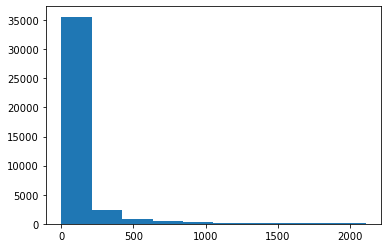

In [35]:
plt.hist(X_train_imputed_df['installer']);

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


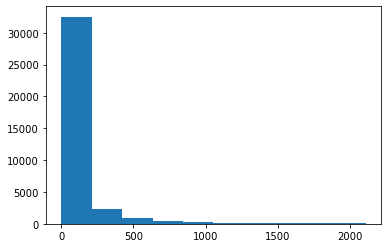

In [32]:
plt.hist(X_train['installer']);